In [1]:
%load_ext autoreload
%autoreload 2

# External imports
from datetime import datetime
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

# Local imports
from investment_analysis.constants import colors as co
from investment_analysis.constants import feature_names as fn

In [2]:
two_year_bond_df = pl.read_csv('../data/DGS2.csv')
ten_year_bond_df = pl.read_csv('../data/DGS10.csv')

# Join the two dataframes
df = two_year_bond_df.join(ten_year_bond_df, on='observation_date', how='inner')

# Remove rows with missing values
df = df.drop_nulls()

# Cast observation_date column to a datetime
df = df.with_columns([
    pl.col('observation_date').cast(pl.Date),
])

# Rename columns into more descriptive names
df = df.rename({
    'observation_date': fn.DATETIME,
    'DGS2': fn.TWO_YEAR_TREASURY_BOND,
    'DGS10': fn.TEN_YEAR_TREASURY_BOND,
})

In [3]:
# Calculate the yield curve
df = df.with_columns((pl.col(fn.TEN_YEAR_TREASURY_BOND) - pl.col(fn.TWO_YEAR_TREASURY_BOND)).alias(fn.YIELD_CURVE))

In [4]:
# List all major recessions in the US since 1990
recessions = [
    (datetime(2020, 2, 20), datetime(2020, 4, 15)),  # The Covid Recession (2020)
    (datetime(2007, 12, 1), datetime(2009, 6, 30)),  # The Great Recession (2007-2009)
    (datetime(2001, 3, 1), datetime(2001, 11, 30)),  # The Dot Com Recession (2001)
    (datetime(1990, 7, 1), datetime(1991, 3, 31)),   # The Gulf War Recession (1990-1991)
]

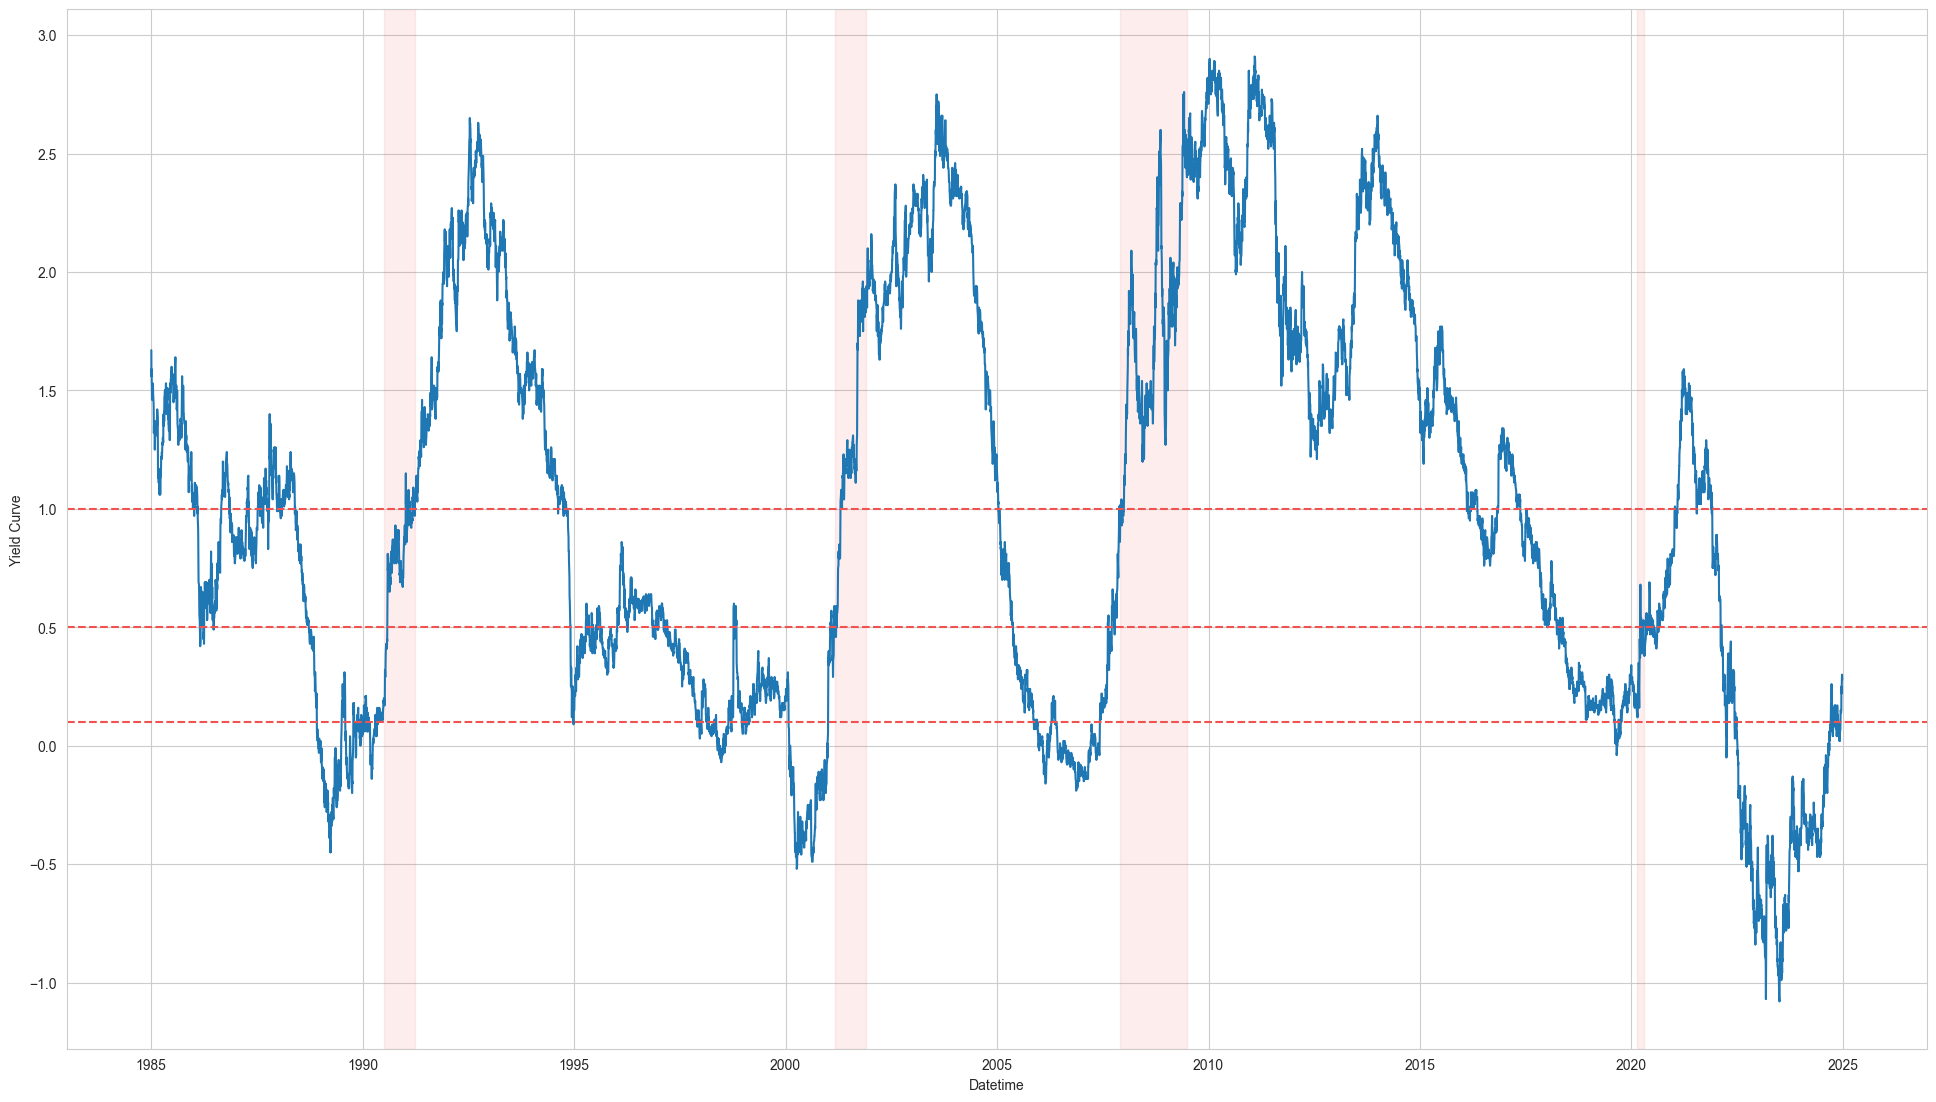

In [5]:
sns.set_style("whitegrid")

plt.figure(figsize=(24, 13.5))

ax = sns.lineplot(df, x=fn.DATETIME, y=fn.YIELD_CURVE, color=co.HONOLULU_BLUE)

# Add recession shading
for start, end in recessions:
    ax.axvspan(start, end, color=co.IMPERIAL_RED_MAIN, alpha=0.1)

# Add horizontal lines to indicate hotzone
for y in [0.1, 0.5, 1.0]:
    ax.axhline(y=y, color=co.IMPERIAL_RED_MAIN, linestyle='--')

plt.show()